# **"ID Card Text Extraction Using PaddleOCR"**

### The purpose of this notebook is to test the license plate detection using YOLOv8 and extraction using PaddleOCR

#### **Libraries Used:**
>ultralytics

>PaddleOCR

>East and Craft

#### **What is ultralytics library?**
>Ultralytics is a library for object detection, segmentation, and instance segmentation. It is used for image and video analysis.

#### **What is PaddleOCR library?**
>PaddleOCR is a library for optical character recognition. It is used to extract text from images. It's different from EasyOCR because it uses PaddlePaddle as its backend. PaddlePaddle is an open source deep learning framework which is better for image and video analysis.

#### **How to use?**

>1. Load YOLO weights

>2. Apply PaddleOCR to extract text and save them in DataFrame


# +_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+

# **Mount Drive**

In [2]:
from google.colab import drive

# Attempt to mount Google Drive with a longer timeout
drive.mount('/content/gdrive', force_remount=True, timeout_ms=120000)

Mounted at /content/gdrive


# **Install Dependencies**

In [ ]:
!pip install ultralytics

In [ ]:
!pip install paddlepaddle
!pip install paddleocr

## **Import Libraries**

In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from ultralytics import YOLO
import shutil
import pandas as pd
from paddleocr import PaddleOCR
import random

### Plot Images

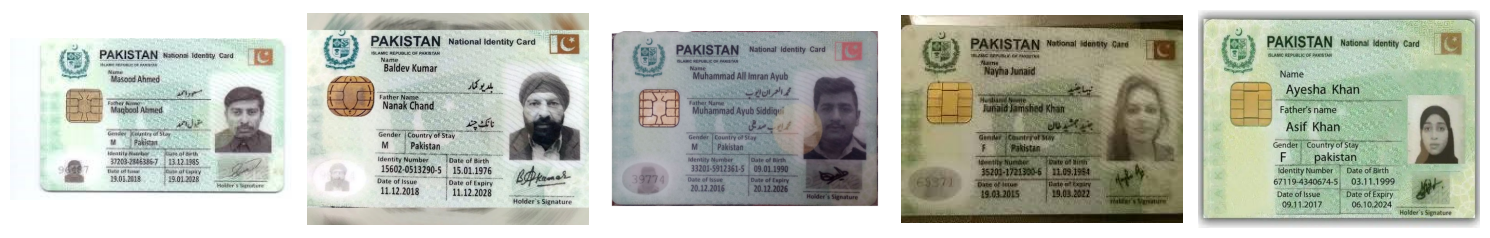

In [13]:
# Define the path to the images folder
folder_path = '/content/gdrive/My Drive/id_extraction/dataset/Test/images'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

# Check if there are at least 15 images
if len(image_files) < 5:
    raise ValueError("Not enough images in the folder. Please make sure there are at least 5 images.")

# Randomly select 15 image files
selected_files = random.sample(image_files, 5)

# Create a figure to plot the images
fig, axes = plt.subplots(1, 5, figsize=(15, 9))  # 3 rows, 5 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each image
for ax, img_file in zip(axes, selected_files):
    img_path = os.path.join(folder_path, img_file)
    with Image.open(img_path) as img:
        ax.imshow(img)
        ax.axis('off')  # Hide axes

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### DataSet Size

In [14]:
import os

# List of folder paths and their corresponding labels
folders = {
    'Train': '/content/gdrive/My Drive/id_extraction/dataset/Train/images',
    'Test': '/content/gdrive/My Drive/id_extraction/dataset/Test/images',
    'Valid': '/content/gdrive/My Drive/id_extraction/dataset/Valid/images'
}

# Iterate over each folder path and label
for label, folder_path in folders.items():
    # List all image files in the folder
    image_files = [filename for filename in os.listdir(folder_path) if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.webp', '.JPG'))]

    # Count the number of images
    num_images = len(image_files)

    # Print the number of images with a friendly label
    print(f"Number of images in {label}: {num_images}")

Number of images in Train: 18
Number of images in Test: 5
Number of images in Valid: 2


# **Training the Detection Model**

### Set route path to access data for training

In [19]:
ROOT_DIR = '/content/gdrive/My Drive/id_extraction/dataset'

### Train the model

In [22]:
# Load a model
model = YOLO('yolov8n.pt')

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=200, imgsz=640)

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/My Drive/id_extraction/dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/gdrive/MyDrive/id_extraction/dataset/Train/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:13<00:00,  1.38it/s]

train: New cache created: /content/gdrive/MyDrive/id_extraction/dataset/Train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/id_extraction/dataset/Valid/labels... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

val: New cache created: /content/gdrive/MyDrive/id_extraction/dataset/Valid/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.36G      3.237      3.559      1.877         70        640: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.77s/it]

                   all          2         43      0.005     0.0698    0.00268    0.00044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.31G      3.264       3.52       1.96         73        640: 100%|██████████| 2/2 [00:04<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all          2         43      0.005     0.0698    0.00271   0.000796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.32G      2.943      3.561      1.675         95        640: 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.05it/s]

                   all          2         43    0.00833      0.116    0.00475   0.000825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.25G      2.358      3.456      1.513        107        640: 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.78it/s]

                   all          2         43     0.0217      0.302      0.019    0.00727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.14G      1.823      3.105      1.385         41        640: 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.17it/s]

                   all          2         43      0.025      0.349     0.0295      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.29G      1.711      2.905      1.196         96        640: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all          2         43     0.0433      0.605     0.0725     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.32G       1.46       2.39      1.097         55        640: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all          2         43     0.0633      0.884      0.359      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.25G      1.392      1.972      1.088         59        640: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]

                   all          2         43       0.07      0.977      0.234     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.29G      1.453       1.89      1.056        143        640: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          2         43       0.07      0.977      0.196     0.0844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.32G       1.48       1.54      1.053         49        640: 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.32it/s]

                   all          2         43       0.07      0.977        0.3      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.32G      1.265      1.368      1.019         56        640: 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.48it/s]

                   all          2         43      0.113      0.837      0.551      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.21G       1.41      1.328      1.045         98        640: 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.88it/s]

                   all          2         43      0.817      0.605      0.768      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.32G      1.436      1.263      1.058         38        640: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.38it/s]

                   all          2         43      0.881      0.517      0.735      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200       2.3G      1.412      1.192      1.052         48        640: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.81it/s]

                   all          2         43      0.953       0.47      0.768      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200       2.3G      1.467      1.159       1.03        130        640: 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.63it/s]

                   all          2         43      0.961      0.572      0.798      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.32G      1.409      1.164      1.033         43        640: 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.16it/s]

                   all          2         43      0.904      0.439      0.724       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200       2.2G      1.376      1.065      0.986         95        640: 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.66it/s]

                   all          2         43      0.883      0.529      0.767      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.27G      1.329      1.048     0.9919         67        640: 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.61it/s]

                   all          2         43      0.769      0.512      0.746      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.16G      1.423      1.068      1.103         61        640: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          2         43      0.727      0.558      0.736      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.31G      1.345     0.9923      1.054         78        640: 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          2         43      0.774      0.558      0.747      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.31G      1.394      1.093      1.019         60        640: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all          2         43      0.823      0.535      0.707      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.25G      1.343      1.081      1.014         60        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          2         43      0.833      0.488      0.705      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.32G      1.199      1.003       1.01         48        640: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          2         43      0.818      0.524      0.703      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.32G      1.288     0.9297      1.007         73        640: 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all          2         43      0.802      0.566      0.696      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.32G      1.266      1.004      1.005         44        640: 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

                   all          2         43      0.816      0.618      0.708      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.32G      1.198      0.947      1.017         65        640: 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.68it/s]

                   all          2         43      0.804      0.668      0.771      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200       2.2G      1.181     0.9015      1.023         80        640: 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.90it/s]

                   all          2         43      0.839      0.767      0.807      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.32G      1.413     0.9095     0.9783        105        640: 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.30it/s]

                   all          2         43      0.839      0.767      0.807      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200       2.3G      1.103     0.9114     0.9905         42        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all          2         43      0.877      0.767      0.819      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.33G      1.294     0.9079      1.019         55        640: 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.73it/s]

                   all          2         43      0.865      0.744       0.87      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.33G      1.362     0.8984     0.9691        133        640: 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.43it/s]

                   all          2         43      0.865      0.744       0.87      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.31G      1.248     0.9953      1.038         41        640: 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.29it/s]

                   all          2         43      0.923      0.767       0.92      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.33G      1.377     0.9466     0.9754        159        640: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.17it/s]

                   all          2         43        0.9      0.842      0.934      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.32G       1.24     0.9524      1.014         49        640: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          2         43        0.9      0.842      0.934      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200       2.3G      1.302     0.8515     0.9724         77        640: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          2         43      0.886      0.901      0.946      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.32G      1.223      0.807      0.966         87        640: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          2         43      0.946      0.953      0.963       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.33G      1.245     0.8398     0.9408        112        640: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all          2         43      0.946      0.953      0.963       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.32G      1.206     0.8232     0.9777         95        640: 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.46it/s]

                   all          2         43      0.903      0.907       0.95       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.31G      1.213     0.8172     0.9504        136        640: 100%|██████████| 2/2 [00:00<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.34it/s]

                   all          2         43      0.944      0.884      0.958      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200       2.2G      1.138     0.8163     0.9672        104        640: 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.95it/s]

                   all          2         43      0.944      0.884      0.958      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.32G      1.202     0.8486     0.9527        115        640: 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.57it/s]


                   all          2         43      0.951      0.902      0.962      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.33G      1.238     0.8391     0.9432        138        640: 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.47it/s]

                   all          2         43      0.954       0.93       0.97      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.33G      1.127     0.8413     0.9683         48        640: 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]

                   all          2         43      0.954       0.93       0.97      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.24G      1.118     0.7539     0.9351         89        640: 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all          2         43      0.953      0.942      0.973      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.33G      1.123     0.8118     0.9915         69        640: 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]

                   all          2         43      0.953      0.942      0.973      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.33G      1.316     0.9046      1.021         51        640: 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]


                   all          2         43      0.952      0.924      0.969      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.33G      1.129     0.7493     0.9148        115        640: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.45it/s]

                   all          2         43      0.952      0.924      0.969      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.26G      1.115     0.7786      0.947         96        640: 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all          2         43      0.957      0.907      0.962      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.27G      1.262     0.7957     0.9307        155        640: 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all          2         43      0.957      0.907      0.962      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       2.3G      1.211      0.778     0.9104        106        640: 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.20it/s]

                   all          2         43      0.926      0.953       0.96       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.26G      1.103     0.7498     0.9414         99        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.27it/s]

                   all          2         43      0.926      0.953       0.96       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.28G      1.134      0.759     0.9593         64        640: 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 29.45it/s]

                   all          2         43      0.931      0.947      0.958       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.24G      1.229     0.8192     0.9496        162        640: 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]

                   all          2         43      0.931      0.947      0.958       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.32G      1.142     0.7532     0.9407         99        640: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.41it/s]

                   all          2         43      0.949      0.953      0.962      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.31G      1.144     0.7706     0.9924         60        640: 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.40it/s]

                   all          2         43      0.949      0.953      0.962      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.23G      1.171     0.8201     0.9896         51        640: 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.27it/s]

                   all          2         43      0.973      0.953      0.965      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.26G      1.187     0.7943     0.9415         54        640: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all          2         43      0.973      0.953      0.965      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.33G      1.141     0.7419     0.9416         84        640: 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          2         43      0.976      0.965      0.971      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.27G      1.153     0.7592      0.948         67        640: 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all          2         43      0.976      0.965      0.971      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.26G       1.16     0.7719     0.9172        117        640: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.12it/s]

                   all          2         43      0.944      0.953      0.973      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.33G      1.091     0.7415      0.943         69        640: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]

                   all          2         43      0.944      0.953      0.973      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.32G      1.082     0.7909      0.947         53        640: 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all          2         43      0.947      0.953      0.972      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.33G      1.086     0.7595     0.9161        122        640: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all          2         43      0.947      0.953      0.972      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.32G      1.123     0.7465     0.9249         72        640: 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.84it/s]

                   all          2         43      0.976      0.953      0.971      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.32G      1.057      0.712     0.9266         99        640: 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.58it/s]

                   all          2         43      0.976      0.953      0.971      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.18G      1.104     0.8416     0.9659         46        640: 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.40it/s]

                   all          2         43      0.947      0.953      0.962       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200       2.3G      1.024     0.7611     0.9181         48        640: 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.03it/s]

                   all          2         43      0.947      0.953      0.962       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.29G      1.068     0.7319     0.9539         58        640: 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.23it/s]

                   all          2         43      0.946      0.953      0.958      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.23G       1.02     0.7096     0.9104         59        640: 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.17it/s]

                   all          2         43      0.946      0.953      0.958      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.29G      1.075     0.6797     0.9231         78        640: 100%|██████████| 2/2 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.21it/s]

                   all          2         43      0.958      0.953      0.961      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.26G      1.039      0.701     0.9301         68        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.67it/s]

                   all          2         43      0.958      0.953      0.961      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.28G      1.118       0.72     0.9143        120        640: 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.05it/s]

                   all          2         43      0.969      0.953      0.962      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.28G      1.225     0.7725     0.9184        149        640: 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all          2         43      0.969      0.953      0.962      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.22G      1.169     0.7178     0.9267         68        640: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all          2         43      0.968      0.953      0.961      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.32G       1.05     0.6773     0.9199         79        640: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.14it/s]

                   all          2         43      0.968      0.953      0.961      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200       2.2G      1.047     0.7252     0.9409         65        640: 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all          2         43      0.947       0.93      0.934      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.32G      1.054     0.6905     0.9299         57        640: 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all          2         43      0.947       0.93      0.934      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.33G      1.109     0.7183     0.9228        111        640: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]

                   all          2         43      0.942       0.93      0.932      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.33G      1.256     0.7455     0.9155        135        640: 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.45it/s]

                   all          2         43      0.942       0.93      0.932      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.32G        1.3     0.7192     0.9169        110        640: 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all          2         43      0.933      0.972      0.954      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.31G      1.198     0.7636     0.9223        140        640: 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.36it/s]

                   all          2         43      0.933      0.972      0.954      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.26G      1.077     0.6607     0.9276         77        640: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all          2         43      0.953      0.949      0.956      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.31G      1.042     0.6945     0.9126         87        640: 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.14it/s]

                   all          2         43      0.953      0.949      0.956      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.28G       1.02     0.6622     0.9063         82        640: 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

                   all          2         43      0.909      0.977      0.958      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.31G      1.066     0.7648     0.9186        144        640: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all          2         43      0.909      0.977      0.958      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.32G      1.031     0.6656     0.9096         72        640: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          2         43      0.926      0.977      0.958      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.32G       1.15     0.8215     0.9091        158        640: 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.12it/s]

                   all          2         43      0.926      0.977      0.958      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.32G      1.008     0.7151     0.9226         43        640: 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

                   all          2         43      0.952      0.977      0.961      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.33G      1.087     0.7134     0.8913        113        640: 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.86it/s]

                   all          2         43      0.952      0.977      0.961      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200       2.3G      1.037     0.6711     0.9015         85        640: 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]

                   all          2         43      0.953      0.977      0.968      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.32G      1.061     0.7581     0.9486         36        640: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.47it/s]

                   all          2         43      0.953      0.977      0.968      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.32G       1.02     0.6522     0.9082         85        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all          2         43      0.977      0.974      0.971      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.32G      1.107       0.69      0.947         62        640: 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.68it/s]

                   all          2         43      0.977      0.974      0.971      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.25G      1.068     0.6598     0.8923        104        640: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.24it/s]

                   all          2         43      0.972      0.977      0.969      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.33G      1.012     0.6337      0.895         84        640: 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all          2         43      0.972      0.977      0.969      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.32G      1.045     0.6675     0.9057         93        640: 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all          2         43       0.97      0.977      0.968      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.28G      1.093     0.7554     0.8963        165        640: 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all          2         43       0.97      0.977      0.968      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.33G      1.043     0.7153     0.8865        139        640: 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.37it/s]

                   all          2         43      0.972      0.977      0.971      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.32G      1.007     0.6999     0.9306         45        640: 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.90it/s]

                   all          2         43      0.972      0.977      0.971      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.33G     0.9894     0.6333     0.8894         71        640: 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.58it/s]

                   all          2         43      0.975      0.977      0.965      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.21G      1.008     0.6572     0.9447         56        640: 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.52it/s]

                   all          2         43      0.975      0.977      0.965      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.27G      1.023     0.6952     0.9411         47        640: 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.13it/s]

                   all          2         43      0.977      0.975      0.966      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.33G     0.9556       0.63     0.9033         72        640: 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          2         43      0.977      0.975      0.966      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.33G     0.9478     0.6347     0.9185         63        640: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all          2         43      0.969      0.953      0.966      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200       2.3G     0.9942     0.6554     0.9097         65        640: 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all          2         43      0.969      0.953      0.966      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200       2.3G      1.084     0.6616     0.9082        100        640: 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.85it/s]

                   all          2         43      0.976      0.963      0.967      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.33G     0.9701     0.6376     0.9277         56        640: 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          2         43      0.976      0.963      0.967      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.32G     0.9653      0.615     0.9145         74        640: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.59it/s]

                   all          2         43      0.976      0.949      0.967      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.29G     0.9946     0.6298     0.9278         70        640: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.02it/s]

                   all          2         43      0.976      0.949      0.967      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.26G      1.001     0.6466     0.9019        106        640: 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.57it/s]

                   all          2         43      0.976      0.945      0.967      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.32G      1.002     0.6441      0.926         49        640: 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]

                   all          2         43      0.976      0.945      0.967      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.27G     0.9987     0.6574     0.8894        113        640: 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.86it/s]

                   all          2         43      0.928      0.977      0.967        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.33G     0.9132     0.6161     0.9138         67        640: 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.36it/s]

                   all          2         43      0.928      0.977      0.967        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.25G     0.9104     0.5892     0.8976         66        640: 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.61it/s]

                   all          2         43      0.947      0.977      0.969      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.32G     0.9295      0.608     0.9012         79        640: 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all          2         43      0.947      0.977      0.969      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.32G     0.9388     0.6091     0.8795         95        640: 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.49it/s]

                   all          2         43      0.951      0.977      0.971      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.26G      1.117     0.6916     0.9688         45        640: 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          2         43      0.951      0.977      0.971      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.26G       1.02     0.6869     0.9496         48        640: 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]


                   all          2         43      0.951      0.977      0.968      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.22G     0.9052     0.6095     0.8957         71        640: 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all          2         43      0.951      0.977      0.968      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.25G     0.9493     0.5967     0.8752         78        640: 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all          2         43      0.951      0.977      0.971      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.32G          1     0.6797      0.881        141        640: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all          2         43      0.951      0.977      0.971      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.26G     0.9629     0.6074     0.8919         79        640: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all          2         43      0.977      0.971      0.971      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.27G     0.9862     0.6887     0.8978         48        640: 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.16it/s]

                   all          2         43      0.977      0.971      0.971      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.32G      1.007     0.7365     0.9433         35        640: 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.62it/s]

                   all          2         43      0.977      0.975      0.971      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.31G      0.998     0.6233     0.8935        107        640: 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.86it/s]

                   all          2         43      0.977      0.975      0.971      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.25G     0.9483     0.6064     0.8865        105        640: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.35it/s]

                   all          2         43      0.974      0.977      0.968      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.33G      1.003     0.6852     0.9582         38        640: 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all          2         43      0.974      0.977      0.968      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.25G      1.044     0.6557     0.9065         54        640: 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]

                   all          2         43      0.971      0.977      0.967      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.26G     0.8967     0.5929     0.8916         73        640: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.60it/s]

                   all          2         43      0.971      0.977      0.967      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.32G     0.8884     0.5792     0.9059         72        640: 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.41it/s]

                   all          2         43      0.951      0.977      0.966      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.33G     0.9717      0.607     0.8998         69        640: 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.28it/s]

                   all          2         43      0.951      0.977      0.966      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.33G     0.9818      0.623     0.8708         73        640: 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.02it/s]

                   all          2         43      0.951      0.977      0.962       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.25G      1.058     0.6272     0.8873         79        640: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all          2         43      0.951      0.977      0.962       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200       2.2G      0.994     0.6205     0.9067         88        640: 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.00it/s]

                   all          2         43       0.95      0.977      0.965      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.32G     0.9572     0.6469     0.9047         48        640: 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          2         43       0.95      0.977      0.965      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.32G       1.07     0.6444     0.9532         49        640: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all          2         43       0.97      0.977      0.965      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.33G     0.9509      0.622     0.9275         51        640: 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          2         43       0.97      0.977      0.965      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.26G     0.9986     0.6333     0.8787        101        640: 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.65it/s]

                   all          2         43      0.971      0.977      0.968      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.26G     0.9777      0.587     0.9192         47        640: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all          2         43      0.971      0.977      0.968      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.33G      1.015     0.6988     0.8945        149        640: 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.84it/s]

                   all          2         43      0.973      0.977      0.968      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.27G     0.9636     0.6017     0.9067         60        640: 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all          2         43      0.973      0.977      0.968      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.28G      1.004     0.6353     0.8828        125        640: 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.36it/s]

                   all          2         43      0.972      0.977      0.968      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.32G     0.9974     0.6022     0.9101         61        640: 100%|██████████| 2/2 [00:00<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.76it/s]

                   all          2         43      0.972      0.977      0.968      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200       2.3G     0.9139     0.5856     0.8697         95        640: 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.90it/s]

                   all          2         43      0.972      0.977      0.969      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.32G     0.9544     0.6006     0.9072         93        640: 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.33it/s]

                   all          2         43      0.972      0.977      0.969      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.33G     0.8687     0.5557     0.8859         82        640: 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.23it/s]

                   all          2         43      0.973      0.977      0.969      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.32G     0.9192     0.5655     0.8905         83        640: 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]

                   all          2         43      0.973      0.977      0.969      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200       2.2G     0.9798     0.6258     0.8875         92        640: 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.73it/s]

                   all          2         43      0.974      0.977       0.97      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.33G      0.897      0.608     0.8788        118        640: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all          2         43      0.974      0.977       0.97      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.33G     0.9276     0.5594     0.8852        103        640: 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all          2         43      0.974      0.977      0.971       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.32G     0.9531     0.6128     0.8887         56        640: 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.57it/s]

                   all          2         43      0.974      0.977      0.971       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.26G     0.8801     0.5637     0.8782        106        640: 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.54it/s]

                   all          2         43      0.973      0.977      0.971      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.32G     0.8975     0.5639     0.8756         79        640: 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.30it/s]

                   all          2         43      0.973      0.977      0.971      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.33G     0.9052     0.5771     0.8787         69        640: 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.99it/s]

                   all          2         43      0.972      0.977       0.97      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.33G       0.95     0.5989     0.9013         53        640: 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.75it/s]

                   all          2         43      0.972      0.977       0.97      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.26G      0.887     0.5638     0.8631        108        640: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.34it/s]

                   all          2         43      0.972      0.977      0.966      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.32G     0.9642       0.58     0.9063         73        640: 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]

                   all          2         43      0.972      0.977      0.966      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.32G     0.9551     0.6558     0.8874        144        640: 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          2         43      0.971      0.977      0.965      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.28G     0.8931      0.631     0.9112         52        640: 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.30it/s]

                   all          2         43      0.971      0.977      0.965      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200       2.3G     0.8591     0.5532     0.8587         88        640: 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          2         43       0.97      0.977      0.966      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.32G     0.9225     0.6101     0.8922         56        640: 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.04it/s]

                   all          2         43       0.97      0.977      0.966      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.33G     0.9008     0.5613     0.8856         68        640: 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.41it/s]

                   all          2         43       0.97      0.977      0.966      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.32G     0.9837     0.5692     0.8676         91        640: 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all          2         43       0.97      0.977      0.966      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.32G     0.8449     0.5583     0.8696         64        640: 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all          2         43      0.969      0.977      0.967      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.26G     0.8672      0.556     0.9057         61        640: 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all          2         43      0.969      0.977      0.967      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.32G     0.8527     0.5795     0.8908         53        640: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          2         43      0.969      0.977      0.968      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.32G     0.8959     0.5763     0.8667        122        640: 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.80it/s]

                   all          2         43      0.969      0.977      0.968      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.32G     0.8773     0.5771     0.8794         62        640: 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          2         43      0.967      0.977      0.967      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.33G     0.9172     0.6303     0.9096         40        640: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.03it/s]

                   all          2         43      0.967      0.977      0.967      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200       2.3G     0.9271     0.5741     0.8619        108        640: 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.96it/s]

                   all          2         43      0.969      0.977      0.966      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.32G     0.8556     0.5616     0.8679         66        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all          2         43      0.969      0.977      0.966      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.24G     0.8767      0.592     0.8802        114        640: 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all          2         43      0.967      0.977      0.966      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.32G     0.8293     0.5926     0.8852         51        640: 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all          2         43      0.967      0.977      0.966      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.33G     0.8813     0.5581     0.9024         78        640: 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.12it/s]

                   all          2         43      0.967      0.977      0.966      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       2.3G     0.8774     0.5749     0.8847        105        640: 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all          2         43      0.967      0.977      0.966      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.32G      1.015       0.69      0.871        167        640: 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all          2         43      0.963      0.977      0.965      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.21G     0.9642     0.6126     0.8841        112        640: 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.26it/s]

                   all          2         43      0.963      0.977      0.965      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.32G     0.8681     0.5673     0.8709         63        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.56it/s]

                   all          2         43      0.963      0.977      0.965      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.26G      0.872     0.6189     0.8853        134        640: 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


                   all          2         43      0.963      0.977      0.965      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.32G     0.8596     0.5506     0.8921         55        640: 100%|██████████| 2/2 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.01it/s]

                   all          2         43      0.954      0.977      0.965      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.32G     0.8505      0.559     0.8848         58        640: 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]

                   all          2         43      0.954      0.977      0.965      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.33G     0.8661     0.5721     0.8626         99        640: 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

                   all          2         43      0.951      0.977      0.965      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.32G     0.8539     0.5594     0.8447        101        640: 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.80it/s]

                   all          2         43      0.951      0.977      0.965      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.33G     0.8831      0.553     0.8797         58        640: 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.33it/s]

                   all          2         43      0.953      0.977      0.965      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.32G     0.8359     0.5565     0.8803         58        640: 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.08it/s]

                   all          2         43      0.953      0.977      0.965      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.29G     0.9538     0.8839     0.9375         21        640: 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          2         43      0.953      0.977      0.965      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.33G     0.8465     0.5534     0.8696         86        640: 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          2         43      0.953      0.977      0.965      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.33G     0.8994     0.5653     0.8866         94        640: 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.63it/s]

                   all          2         43      0.954      0.977      0.965      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.32G     0.8571     0.5624     0.8785         87        640: 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.63it/s]

                   all          2         43      0.954      0.977      0.965      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.33G     0.8662     0.5869     0.8594         59        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          2         43      0.961      0.977      0.966      0.592


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.34G     0.9116     0.6616     0.8909         44        640: 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all          2         43      0.961      0.977      0.966      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.42G     0.9146     0.6837     0.8895         44        640: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all          2         43      0.961      0.977      0.965      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.34G     0.8824      0.642     0.9022         44        640: 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.36it/s]

                   all          2         43      0.961      0.977      0.965      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.34G     0.9032     0.6984     0.9068         42        640: 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.91it/s]

                   all          2         43      0.958      0.977      0.965        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.34G     0.8346     0.6199     0.8742         44        640: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.31it/s]

                   all          2         43      0.958      0.977      0.965        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.34G       0.95     0.7523     0.8666         42        640: 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.79it/s]

                   all          2         43      0.958      0.977      0.964      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.34G     0.8708     0.6413     0.8922         44        640: 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.61it/s]

                   all          2         43      0.958      0.977      0.964      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.34G     0.9449     0.6668     0.8665         44        640: 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.59it/s]

                   all          2         43      0.955      0.977      0.963      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.34G     0.9345     0.6219      0.894         44        640: 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.82it/s]

                   all          2         43      0.955      0.977      0.963      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.34G     0.8691     0.6307     0.8595         44        640: 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.97it/s]

                   all          2         43      0.978          1      0.995      0.612



200 epochs completed in 0.076 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


                   all          2         43      0.971      0.977      0.968      0.618
Speed: 0.2ms preprocess, 35.3ms inference, 0.0ms loss, 16.9ms postprocess per image
Results saved to runs/detect/train4


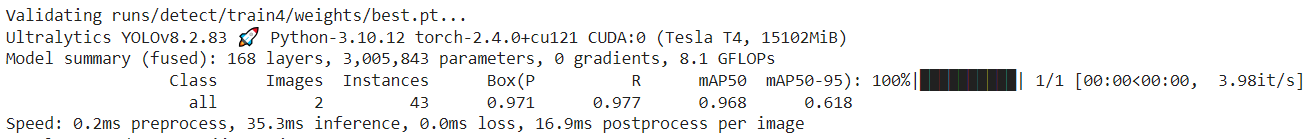

### Saving runs folder to Drive

In [23]:
source_path = '/content/runs/'
destination_path = '/content/gdrive/My Drive/id_extraction/runs_backup'
shutil.copytree(source_path, destination_path)

'/content/gdrive/My Drive/id_extraction/runs_backup'

# **Testing the Model and Extracting Text**

### Load the best weights of trained YOLO

In [19]:
model = YOLO("best.pt")

### Test model on image files


image 1/1 x:\ML1\WEEK8\day4\20.jpg: 480x640 22 texts, 662.6ms
Speed: 119.3ms preprocess, 662.6ms inference, 47.0ms postprocess per image at shape (1, 3, 480, 640)


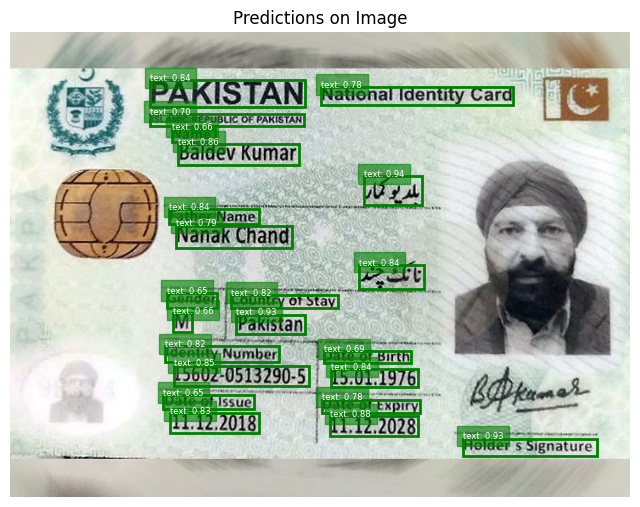

In [27]:
# Load the image
image_path = '20.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Make predictions
results = model.predict(source=image_path)

# Plot the image with predictions
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.axis('off')  # Hide axes
ax.set_title('Predictions on Image')

# Plot the bounding boxes and labels
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='green', linewidth=2))
        label = f"{result.names[int(box.cls[0])]}: {box.conf[0]:.2f}"
        ax.text(x1, y1, label, fontsize=6, color='white', bbox=dict(facecolor='green', edgecolor='green', alpha=0.6))

plt.show()

## **Paddle OCR**


0: 480x640 22 texts, 108.0ms
Speed: 4.0ms preprocess, 108.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


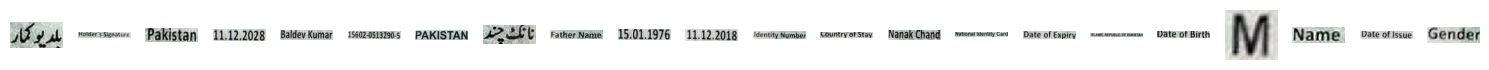

In [28]:
def detect_and_crop_single_image(image_path, model, threshold=0.15):
    image = cv2.imread(image_path)
    results = model(image)[0]
    cropped_images = []
    for x1, y1, x2, y2, score, class_id in results.boxes.data.tolist():
        if score > threshold:
            cropped_image = image[int(y1):int(y2), int(x1):int(x2)]
            cropped_images.append(cropped_image)
    return cropped_images

# Example usage
model = YOLO('best.pt')

cropped_images = detect_and_crop_single_image('20.jpg', model)

# Display the cropped images
fig, axs = plt.subplots(1, len(cropped_images), figsize=(15, 15))
if len(cropped_images) == 1:
    axs = [axs]  # Ensure axs is iterable

for ax, cropped_image in zip(axs, cropped_images):
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    ax.imshow(cropped_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [29]:
from IPython.display import clear_output
def apply_ocr_to_images(cropped_images, ocr_model):
    extracted_texts = []
    for cropped_image in cropped_images:
        result = ocr_model.ocr(cropped_image, cls=False)
        if result and result[0]:  # Check if result is not None and not empty
            text = " ".join([line[1][0] for line in result[0]])
            extracted_texts.append(text)
        else:
            extracted_texts.append("No text detected")  # Handle empty result
    return extracted_texts

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')
ocr = PaddleOCR(use_angle_cls=True, lang='ur')

# Apply OCR to cropped images
extracted_texts = apply_ocr_to_images(cropped_images, ocr)

clear_output()
for i in extracted_texts:
    print(i)

No text detected
Holder Signature
Pakistan
1.12.202
Baldev Kumar
15602-05132905
PAKISTAN
No text detected
ather Nae
15.011976
11.12.201
dentity١ Numbe
No text detected
Nanak Chand
National Identity ard
0a Exir
SLMI REPUBLIOFPAKSTAN
No text detected
No text detected
ae
De 155e
No text detected


# **East-and_Craft (BenchMark)**

0.8887243270874023


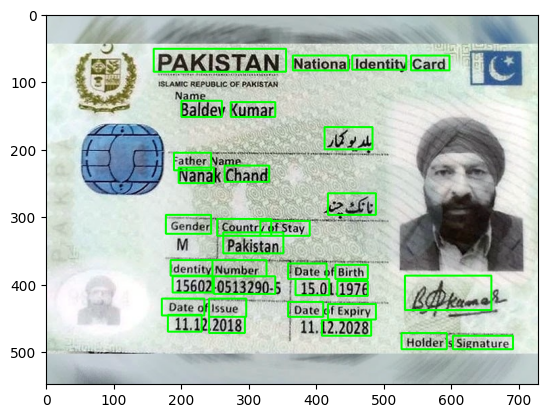

In [30]:
import os, sys
import numpy as np
import cv2
import time
from imutils.object_detection import non_max_suppression

def east_detect(image):
    layerNames = [
    	"feature_fusion/Conv_7/Sigmoid",
    	"feature_fusion/concat_3"]
    
    orig = image.copy()
    
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    (H, W) = image.shape[:2]
    
    # set the new width and height and then determine the ratio in change
    # for both the width and height: Should be multiple of 32
    (newW, newH) = (320, 320)
    
    rW = W / float(newW)
    rH = H / float(newH)
    
    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))
    
    (H, W) = image.shape[:2]
    
    net = cv2.dnn.readNet("frozen_east_text_detection.pb")
    
    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    	(123.68, 116.78, 103.94), swapRB=True, crop=False)
    
    start = time.time()
    
    net.setInput(blob)
    
    (scores, geometry) = net.forward(layerNames)
    
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the geometrical
        # data used to derive potential bounding box coordinates that
        # surround text
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]
    
        for x in range(0, numCols):
    		# if our score does not have sufficient probability, ignore it
            # Set minimum confidence as required
            if scoresData[x] < 0.5:
                continue
    		# compute the offset factor as our resulting feature maps will
            #  x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            # extract the rotation angle for the prediction and then
            # compute the sin and cosine
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
            # use the geometry volume to derive the width and height of
            # the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
            # compute both the starting and ending (x, y)-coordinates for
            # the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
            # add the bounding box coordinates and probability score to
            # our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])
                        
    boxes = non_max_suppression(np.array(rects), probs=confidences)
    # loop over the bounding boxes
    for (startX, startY, endX, endY) in boxes:
        # scale the bounding box coordinates based on the respective
        # ratios
        startX = int(startX * rW)
        startY = int(startY * rH)
        endX = int(endX * rW)
        endY = int(endY * rH)
        # draw the bounding box on the image
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    
    print(time.time() - start)
    return orig

image = cv2.imread("20.jpg")

out_image = east_detect(image)

plt.imshow(out_image)

### We can observe that our model has outperformed East-and-Craft

# **Further Training using best weights from previous training (if necessary)**

### Save the Model

In [ ]:
# Load a model
model = YOLO('/content/gdrive/My Drive/id_extraction/runs_backup/detect/train4/weights/best.pt')

# Use the model
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=150, imgsz=640)

### Saving runs folder to Drive

In [ ]:
source_path = '/content/runs/'
destination_path = '/content/gdrive/My Drive/id_extraction/runs2_backup'
shutil.copytree(source_path, destination_path)

'/content/gdrive/MyDrive/License_Plate_Detection/runs2_backup'